In [1]:
#importing Libraries importing
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#reading file
df=pd.read_csv("Raw_Housing_Prices2.csv.zip")
print("File read successfully")

File read successfully


In [3]:
df.shape #rows and column size

(21609, 21)

In [4]:
df.head()

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21609 entries, 0 to 21608
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21605 non-null  float64
 5   Flat Area (in Sqft)                        21600 non-null  float64
 6   Lot Area (in Sqft)                         21600 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House

In [6]:
df['ID'].nunique()

21432

In [7]:
df = df.drop(columns=['ID'])

In [8]:
df['Date House was Sold']=pd.to_datetime(df['Date House was Sold'])

In [9]:
df['Sold_Year']=df['Date House was Sold'].dt.year

In [10]:
df.columns=df.columns.str.strip().str.lower()

In [11]:
df.isnull().sum()

date house was sold                              0
sale price                                       0
no of bedrooms                                   0
no of bathrooms                                  4
flat area (in sqft)                              9
lot area (in sqft)                               9
no of floors                                     0
waterfront view                                  0
no of times visited                          19485
condition of the house                           0
overall grade                                    0
area of the house from basement (in sqft)        3
basement area (in sqft)                          0
age of house (in years)                          0
renovated year                                   0
zipcode                                          1
latitude                                         1
longitude                                        1
living area after renovation (in sqft)           1
lot area after renovation (in s

In [12]:
#start by ignoring warnings for a smoother experience
import warnings
warnings.filterwarnings("ignore")

<h3>Data Prerprocessing

In [13]:
#Handling null values
minor_col=['no of bathrooms','flat area (in sqft)','lot area (in sqft)','area of the house from basement (in sqft)','latitude','longitude','living area after renovation (in sqft)']
for col in minor_col:
    df[col].fillna(df[col].mean(),inplace=True)

In [14]:
df['zipcode'].fillna(df['zipcode'].mode()[0],inplace=True)

In [15]:
df=df.drop(columns=['no of times visited'])

In [16]:
df.isnull().sum()

date house was sold                          0
sale price                                   0
no of bedrooms                               0
no of bathrooms                              0
flat area (in sqft)                          0
lot area (in sqft)                           0
no of floors                                 0
waterfront view                              0
condition of the house                       0
overall grade                                0
area of the house from basement (in sqft)    0
basement area (in sqft)                      0
age of house (in years)                      0
renovated year                               0
zipcode                                      0
latitude                                     0
longitude                                    0
living area after renovation (in sqft)       0
lot area after renovation (in sqft)          0
sold_year                                    0
dtype: int64

In [17]:
df.duplicated().sum()  #Checking duplicate values

np.int64(2)

In [18]:
df.drop_duplicates(inplace=True)   #remove duplicate

In [19]:
df.duplicated().sum()

np.int64(0)

In [20]:
df=df.drop(columns=['date house was sold']) #deleting the column as we had already extracted sold year from this

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 0 to 21608
Data columns (total 19 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sale price                                 21607 non-null  float64
 1   no of bedrooms                             21607 non-null  int64  
 2   no of bathrooms                            21607 non-null  float64
 3   flat area (in sqft)                        21607 non-null  float64
 4   lot area (in sqft)                         21607 non-null  float64
 5   no of floors                               21607 non-null  float64
 6   waterfront view                            21607 non-null  object 
 7   condition of the house                     21607 non-null  object 
 8   overall grade                              21607 non-null  int64  
 9   area of the house from basement (in sqft)  21607 non-null  float64
 10  basement area (in sqft)    

In [22]:
df['zipcode'].nunique()

70

In [23]:
df=df.sort_values(['zipcode','sold_year'])

### Creation of lag based and window based features

In [24]:
df['lag_price_zip']=df.groupby('zipcode')['sale price'].shift(1)
df.head()

,sale price,no of bedrooms,no of bathrooms,flat area (in sqft),lot area (in sqft),no of floors,waterfront view,condition of the house,overall grade,area of the house from basement (in sqft),basement area (in sqft),age of house (in years),renovated year,zipcode,latitude,longitude,living area after renovation (in sqft),lot area after renovation (in sqft),sold_year,lag_price_zip
38,240000.0,4,1.00,1220.0,8075.0,1.0,No,Okay,7,890.0,330,49,0,98001.0,47.3341,-122.282,1290.0,7800,2016,NaN
211,465000.0,3,2.50,2714.0,17936.0,2.0,No,Fair,9,2714.0,0,13,0,98001.0,47.3185,-122.275,2590.0,18386,2016,240000.0
352,252000.0,4,1.50,1550.0,19800.0,1.0,No,Good,7,1050.0,500,49,0,98001.0,47.3117,-122.270,1640.0,22654,2016,465000.0
1543,250000.0,4,2.25,1730.0,8400.0,1.0,No,Fair,7,1730.0,0,56,0,98001.0,47.3386,-122.288,1550.0,7920,2016,252000.0
1652,330000.0,4,2.50,3504.0,6000.0,2.0,No,Fair,7,3504.0,0,12,0,98001.0,47.3012,-122.285,2790.0,5231,2016,250000.0


In [25]:
df['rolling_price5_zip'] = (
    df.groupby('zipcode')['sale price']
      .rolling(window=5, min_periods=1)
      .mean()
      .reset_index(level=0, drop=True)
)

In [26]:
df.isnull().sum()

sale price                                    0
no of bedrooms                                0
no of bathrooms                               0
flat area (in sqft)                           0
lot area (in sqft)                            0
no of floors                                  0
waterfront view                               0
condition of the house                        0
overall grade                                 0
area of the house from basement (in sqft)     0
basement area (in sqft)                       0
age of house (in years)                       0
renovated year                                0
zipcode                                       0
latitude                                      0
longitude                                     0
living area after renovation (in sqft)        0
lot area after renovation (in sqft)           0
sold_year                                     0
lag_price_zip                                70
rolling_price5_zip                      

In [27]:
df['lag_price_zip']=df['lag_price_zip'].fillna(df['sale price'])

In [28]:
df.isnull().sum()

sale price                                   0
no of bedrooms                               0
no of bathrooms                              0
flat area (in sqft)                          0
lot area (in sqft)                           0
no of floors                                 0
waterfront view                              0
condition of the house                       0
overall grade                                0
area of the house from basement (in sqft)    0
basement area (in sqft)                      0
age of house (in years)                      0
renovated year                               0
zipcode                                      0
latitude                                     0
longitude                                    0
living area after renovation (in sqft)       0
lot area after renovation (in sqft)          0
sold_year                                    0
lag_price_zip                                0
rolling_price5_zip                           0
dtype: int64

In [29]:
df['rolling_std5_zip']=(
    df.groupby('zipcode')['sale price'].rolling(window=5,min_periods=1).std().reset_index(level=0,drop=True)
)

In [30]:
df['rolling_std5_zip']=df['rolling_std5_zip'].fillna(df['sale price'])

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21607 entries, 38 to 21551
Data columns (total 22 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sale price                                 21607 non-null  float64
 1   no of bedrooms                             21607 non-null  int64  
 2   no of bathrooms                            21607 non-null  float64
 3   flat area (in sqft)                        21607 non-null  float64
 4   lot area (in sqft)                         21607 non-null  float64
 5   no of floors                               21607 non-null  float64
 6   waterfront view                            21607 non-null  object 
 7   condition of the house                     21607 non-null  object 
 8   overall grade                              21607 non-null  int64  
 9   area of the house from basement (in sqft)  21607 non-null  float64
 10  basement area (in sqft)   

In [32]:
df['rolling_min5_zip']=(
    df.groupby('zipcode')['sale price'].rolling(window=5,min_periods=1).min().reset_index(level=0,drop=True)
)

In [33]:
df['rolling_max5_zip']=(
    df.groupby('zipcode')['sale price'].rolling(window=5,min_periods=1).max().reset_index(level=0,drop=True)
)

In [34]:
df['condition of the house'].unique()

array(['Okay', 'Fair', 'Good', 'Excellent', 'Bad'], dtype=object)

### Creating Interaction Features

In [35]:
condition_map = {'Bad': 1,'Okay':2, 'Fair': 3, 'Good': 4, 'Excellent': 5}
df['condition_numeric'] = df['condition of the house'].map(condition_map)

In [36]:
df.isnull().sum()

sale price                                   0
no of bedrooms                               0
no of bathrooms                              0
flat area (in sqft)                          0
lot area (in sqft)                           0
no of floors                                 0
waterfront view                              0
condition of the house                       0
overall grade                                0
area of the house from basement (in sqft)    0
basement area (in sqft)                      0
age of house (in years)                      0
renovated year                               0
zipcode                                      0
latitude                                     0
longitude                                    0
living area after renovation (in sqft)       0
lot area after renovation (in sqft)          0
sold_year                                    0
lag_price_zip                                0
rolling_price5_zip                           0
rolling_std5_

In [37]:
df['Property_Quality_Index'] = (
    df['flat area (in sqft)'] *
    df['overall grade'] *
    df['condition_numeric'] /
    (df['age of house (in years)'] + 1)
)


In [38]:
#Varifying
df[['Property_Quality_Index', 'sale price']].corr()

,Property_Quality_Index,sale price
Property_Quality_Index,1.000000,0.401711
sale price,0.401711,1.000000


In [39]:
df['Structure_Index'] = (
    df['no of bedrooms'] +
    0.5 * df['no of bathrooms'] +
    0.3 * df['no of floors'] +
    (df['basement area (in sqft)'] / 1000)
)

In [40]:
df.isnull().sum()

sale price                                   0
no of bedrooms                               0
no of bathrooms                              0
flat area (in sqft)                          0
lot area (in sqft)                           0
no of floors                                 0
waterfront view                              0
condition of the house                       0
overall grade                                0
area of the house from basement (in sqft)    0
basement area (in sqft)                      0
age of house (in years)                      0
renovated year                               0
zipcode                                      0
latitude                                     0
longitude                                    0
living area after renovation (in sqft)       0
lot area after renovation (in sqft)          0
sold_year                                    0
lag_price_zip                                0
rolling_price5_zip                           0
rolling_std5_

In [41]:
df[['Structure_Index','sale price']].corr()

,Structure_Index,sale price
Structure_Index,1.000000,0.495498
sale price,0.495498,1.000000


##### Now dropping unnecessory columns which have already used in feature engineering

In [42]:
df = df.drop(columns=[
    'flat area (in sqft)',
    'overall grade',
    'condition_numeric',
    'age of house (in years)',
    'no of bedrooms',
    'no of bathrooms',
    'no of floors',
    'basement area (in sqft)'
])

## Creating Synthetic data to external merge for high impact

In [43]:
zipcode = df['zipcode'].unique()

In [44]:
crime_df = pd.DataFrame({
    'zipcode': zipcode,
    'crime_rate_index': np.random.uniform(1.5, 5.0, size=len(zipcode)).round(2)
})
crime_df.head()

,zipcode,crime_rate_index
0,98001.0,4.31
1,98002.0,3.30
2,98003.0,2.80
3,98004.0,1.75
4,98005.0,1.91


In [45]:
facilities_df = pd.DataFrame({
    'zipcode': zipcode,
    'no_of_malls': np.random.randint(0, 5, size=len(zipcode)),
    'no_of_hospitals': np.random.randint(0, 5, size=len(zipcode)),
    'no_of_metro_stations': np.random.randint(0, 3, size=len(zipcode))
})
facilities_df.head()


,zipcode,no_of_malls,no_of_hospitals,no_of_metro_stations
0,98001.0,3,2,2
1,98002.0,0,1,2
2,98003.0,1,0,2
3,98004.0,3,1,1
4,98005.0,1,3,2


#### Merging crime and facility data

In [46]:
df=pd.merge(df,crime_df,on='zipcode',how='left')

In [47]:
df=pd.merge(df,facilities_df,on='zipcode',how='left')

In [48]:
view_map={'No':1,'Yes':2} #mapping

In [49]:
df['waterfront view']=df['waterfront view'].map(view_map) #encoding for ordinal data

## EDA

In [50]:
df.describe()

,sale price,lot area (in sqft),waterfront view,area of the house from basement (in sqft),renovated year,zipcode,latitude,longitude,living area after renovation (in sqft),lot area after renovation (in sqft),...,rolling_price5_zip,rolling_std5_zip,rolling_min5_zip,rolling_max5_zip,Property_Quality_Index,Structure_Index,crime_rate_index,no_of_malls,no_of_hospitals,no_of_metro_stations
count,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,...,2.160700e+04,2.160700e+04,2.160700e+04,2.160700e+04,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000,21607.000000
mean,5.116294e+05,1.511085e+04,1.007544,1788.418247,84.425695,98077.937428,47.560051,-122.213859,1986.624499,12770.847272,...,5.112160e+05,1.512166e+05,3.497383e+05,7.125356e+05,2319.894302,5.167955,3.295302,1.879021,1.928958,1.116999
std,2.500677e+05,4.142493e+04,0.086529,827.975649,401.732547,53.507814,0.138562,0.140829,685.422450,27307.543317,...,1.966088e+05,8.960902e+04,1.549987e+05,2.760257e+05,3184.678497,1.425172,1.023291,1.378780,1.133951,0.760870
min,7.500000e+04,5.200000e+02,1.000000,290.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,...,1.584000e+05,0.000000e+00,7.500000e+04,1.700000e+05,5.178571,0.300000,1.630000,0.000000,0.000000,0.000000
25%,3.219750e+05,5.042500e+03,1.000000,1190.000000,0.000000,98033.000000,47.470950,-122.328000,1490.000000,5100.000000,...,3.490995e+05,8.090010e+04,2.350000e+05,4.750000e+05,595.000000,4.175000,2.360000,1.000000,1.000000,1.000000
50%,4.500000e+05,7.620000e+03,1.000000,1560.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000,...,4.862146e+05,1.324346e+05,3.250000e+05,6.790000e+05,1198.750000,4.990000,3.110000,2.000000,2.000000,1.000000
75%,6.450000e+05,1.070250e+04,1.000000,2210.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10085.000000,...,6.377900e+05,2.093225e+05,4.350000e+05,9.500000e+05,2646.000000,5.900000,4.280000,3.000000,3.000000,2.000000
max,1.129575e+06,1.651359e+06,2.000000,9410.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,...,1.129575e+06,1.129575e+06,1.129575e+06,1.129575e+06,42300.000000,34.755000,4.970000,4.000000,4.000000,2.000000


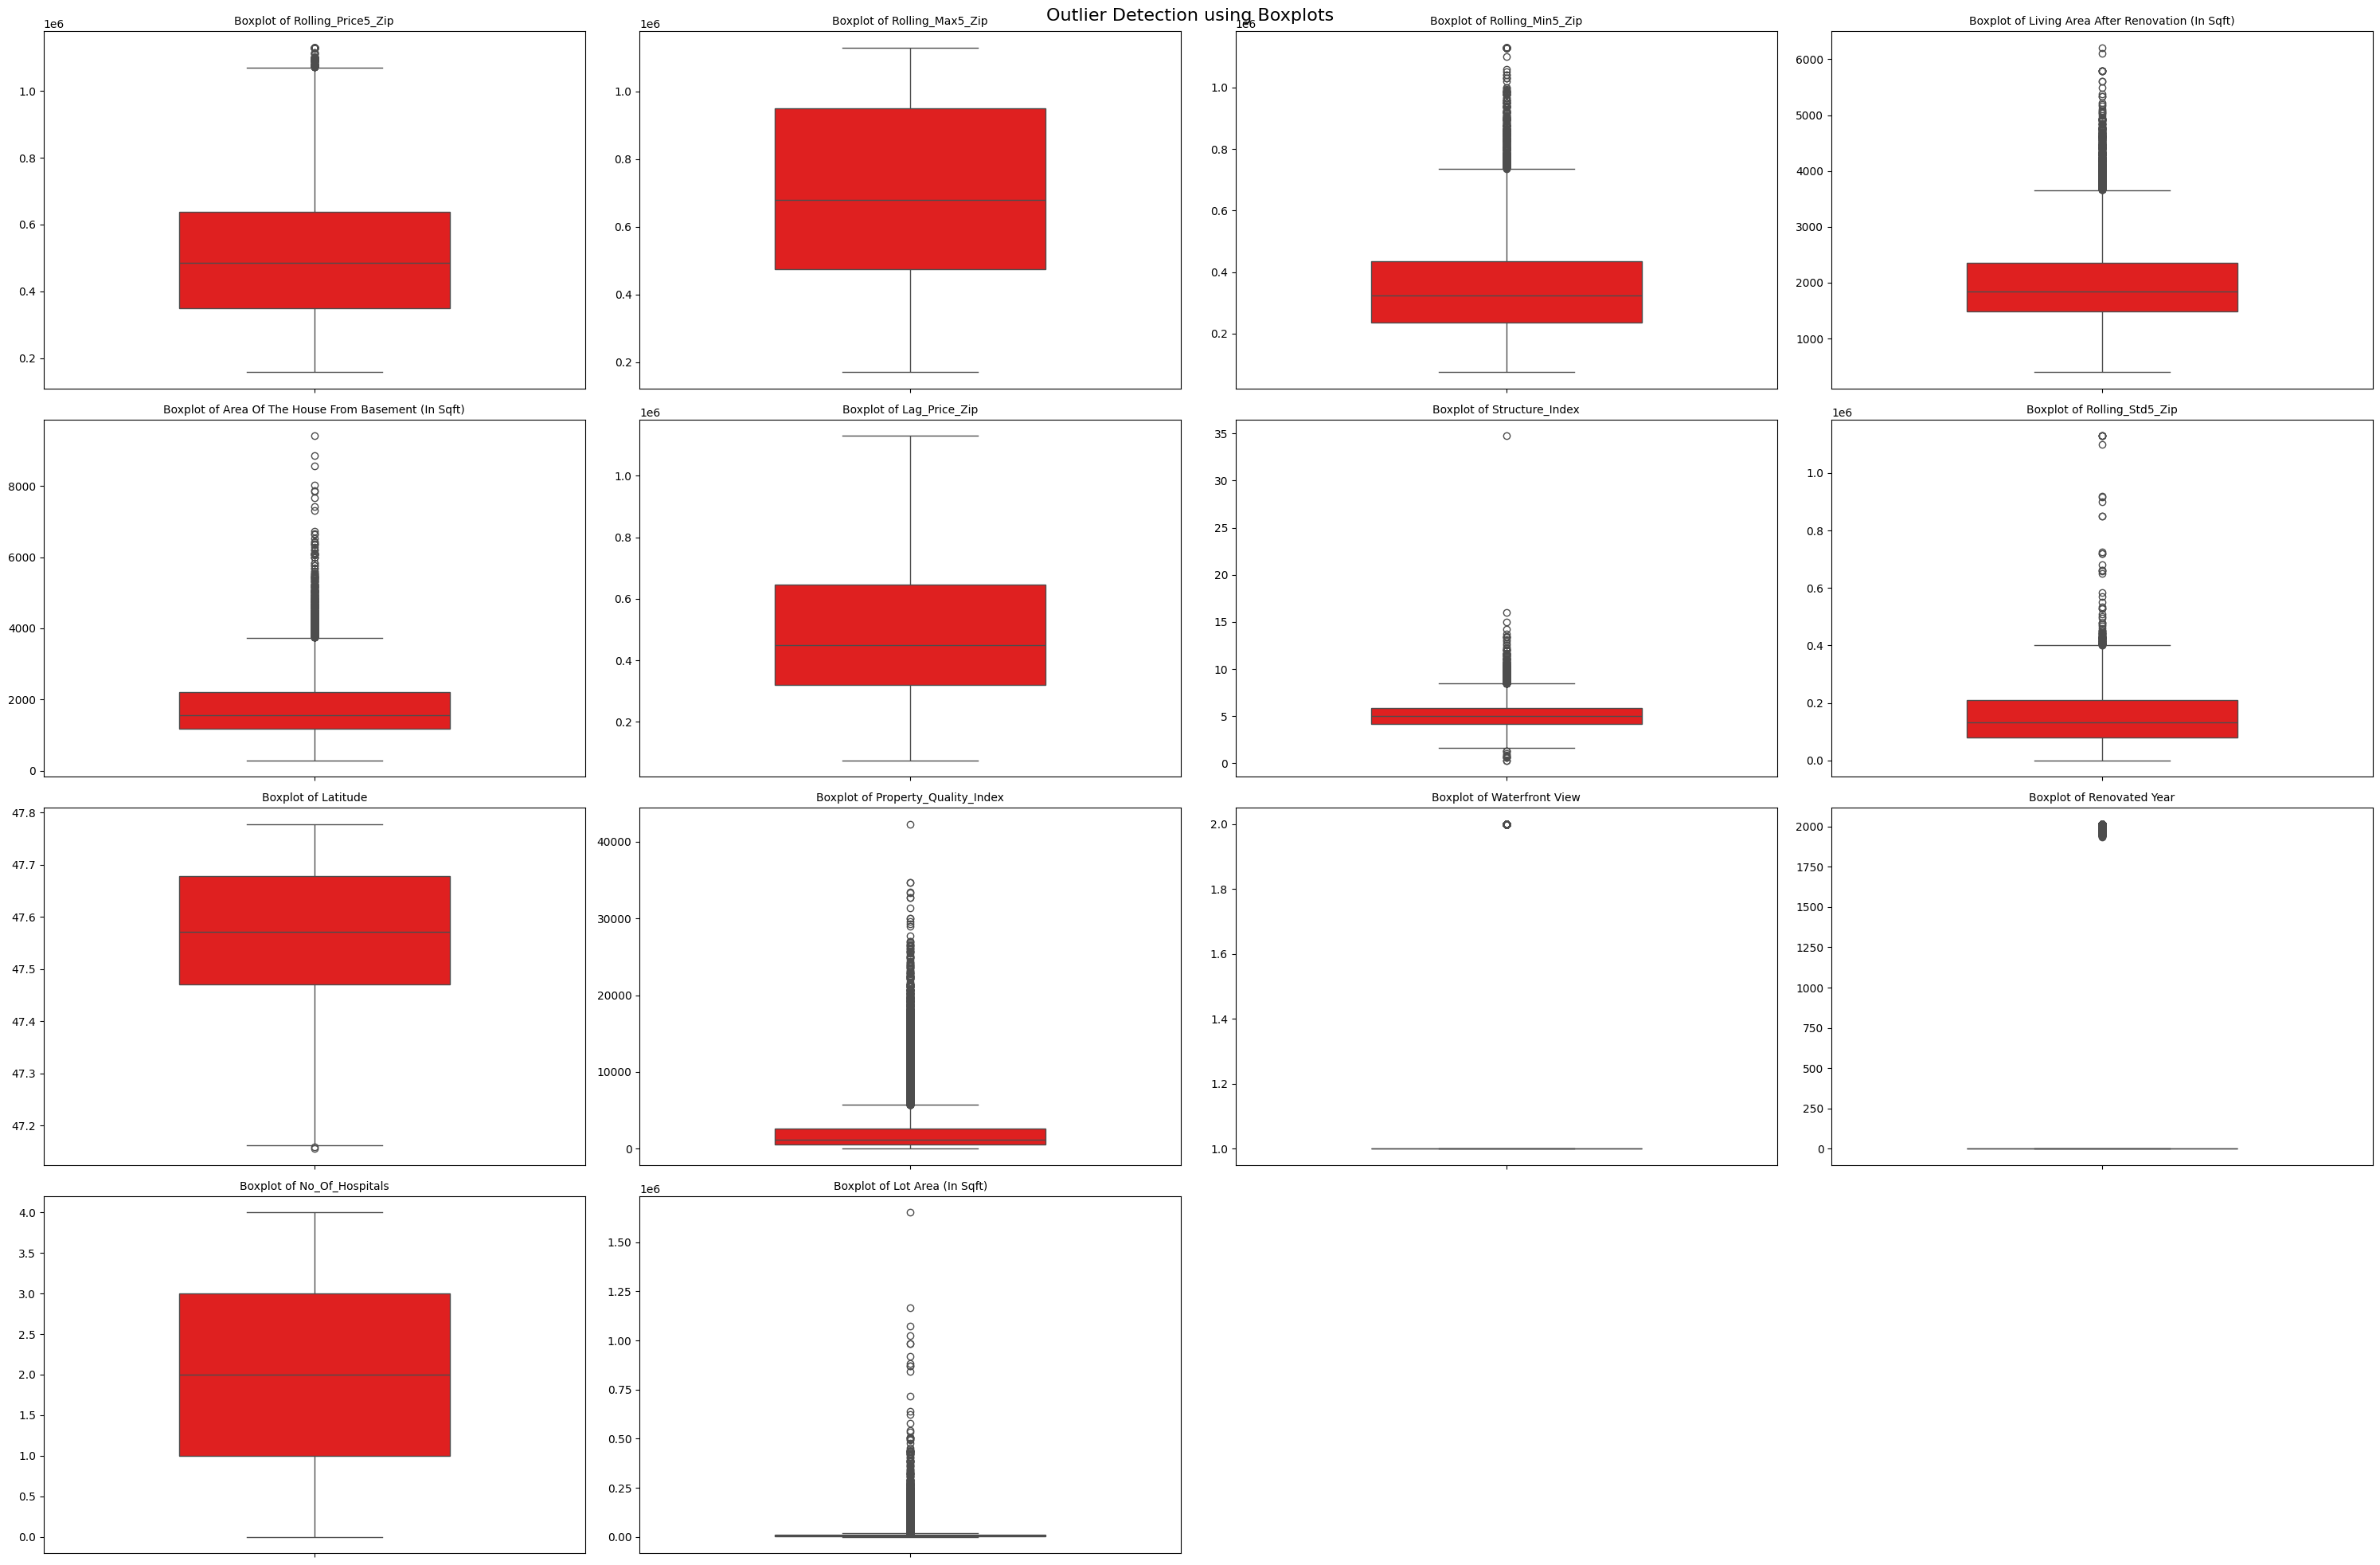

In [51]:
#Ouliers Detection
cols = [
    'rolling_price5_zip','rolling_max5_zip','rolling_min5_zip',
    'living area after renovation (in sqft)',
    'area of the house from basement (in sqft)',
    'lag_price_zip','Structure_Index','rolling_std5_zip',
    'latitude','Property_Quality_Index','waterfront view',
    'renovated year','no_of_hospitals','lot area (in sqft)'
]

fig, axes = plt.subplots(4, 4, figsize=(30, 20))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.boxplot(data=df, y=col, ax=axes[i], color='red', width=0.5)
    axes[i].set_title(f'Boxplot of {col.title()}', fontsize=10)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('')

for j in range(len(cols), len(axes)):
    axes[j].axis('off')

plt.suptitle('Outlier Detection using Boxplots', fontsize=16)
plt.tight_layout()
plt.show()


#### “Outliers in this dataset mainly come from property-size variations and market fluctuations, not data errors,
#### Keep market-based ones (they hold meaning).”

## Visualization

<Axes: xlabel='sale price', ylabel='Count'>

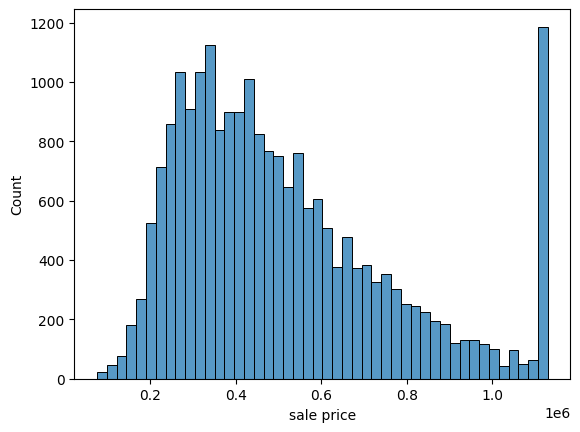

In [52]:
#histogram/distribtion plots
sns.histplot(df['sale price'])

### Interpretation:
#### The histogram of sale price shows that most houses were sold in the ₹2L–₹4L range, with a few high-priced luxury houses around ₹10L.The distribution is right-skewed, meaning affordable houses are more common than expensive ones.

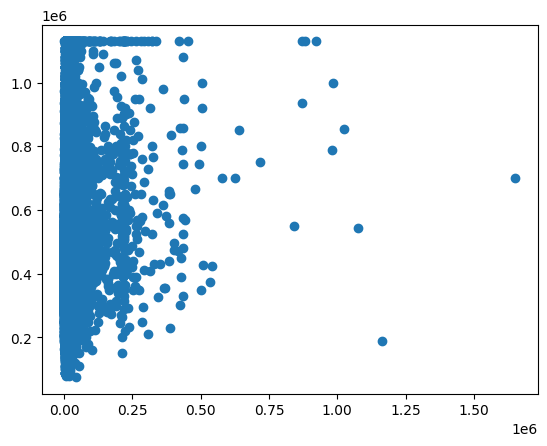

In [53]:
#Scatter plots:
plt.scatter(df['lot area (in sqft)'], df['sale price'])

### Interpretation: Even houses with small lot areas can have very high prices due to other influential factors like location, grade, and condition.
#### This indicates that lot area alone is not a strong price predictor, It shows the non-linear nature of housing prices — multiple variables interact together.
##### Hence, models like XGBoost are ideal because they capture such complex dependencies effectively.

In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21607 entries, 0 to 21606
Data columns (total 23 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   sale price                                 21607 non-null  float64
 1   lot area (in sqft)                         21607 non-null  float64
 2   waterfront view                            21607 non-null  int64  
 3   condition of the house                     21607 non-null  object 
 4   area of the house from basement (in sqft)  21607 non-null  float64
 5   renovated year                             21607 non-null  int64  
 6   zipcode                                    21607 non-null  float64
 7   latitude                                   21607 non-null  float64
 8   longitude                                  21607 non-null  float64
 9   living area after renovation (in sqft)     21607 non-null  float64
 10  lot area after renovat

In [55]:
df['waterfront view'].nunique()

2

In [56]:
df=df.drop(columns=['condition of the house']) #already used in feature engineering

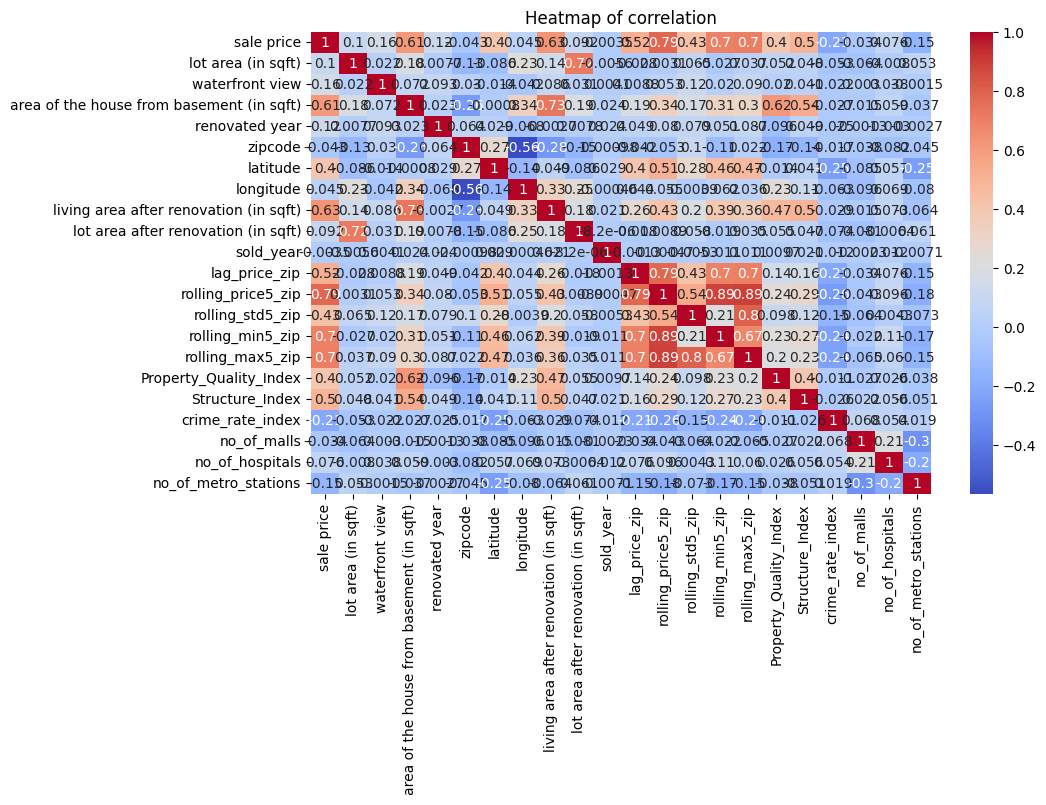

In [57]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)
plt.title("Heatmap of correlation")
plt.show()

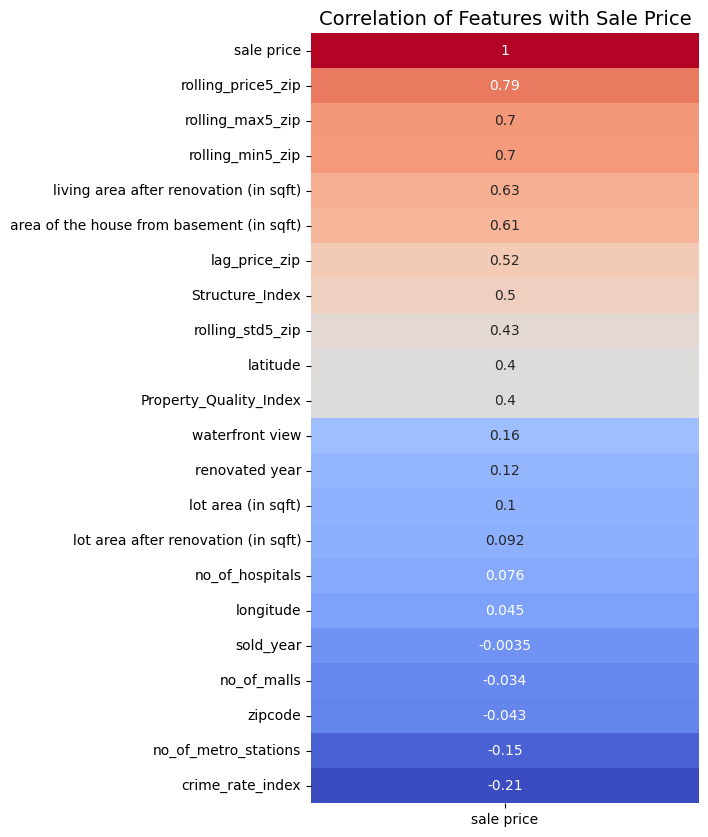

In [58]:
plt.figure(figsize=(5,10))
sns.heatmap(
    df.corr()[['sale price']].sort_values(by='sale price', ascending=False),
    cmap='coolwarm',      
    annot=True,           
    cbar=False        
)
plt.title("Correlation of Features with Sale Price", fontsize=14)
plt.show()

In [59]:
x=df[['rolling_price5_zip','rolling_max5_zip','rolling_min5_zip','living area after renovation (in sqft)','area of the house from basement (in sqft)','lag_price_zip','Structure_Index','rolling_std5_zip','latitude','Property_Quality_Index','waterfront view','renovated year','no_of_hospitals','lot area (in sqft)']]
y=df['sale price']

In [60]:
from sklearn.model_selection import train_test_split

x_Train, x_Test, yTrain, yTest = train_test_split(x, y, test_size=0.25, random_state=42)


In [61]:
from sklearn.preprocessing import StandardScaler

In [62]:
scalar=StandardScaler()

In [63]:
x_scaled=scalar.fit_transform(x_Train)
x_scaled_test=scalar.fit_transform(x_Test)

In [64]:
whos


Variable           Type              Data/Info
----------------------------------------------
StandardScaler     type              <class 'sklearn.preproces<...>ng._data.StandardScaler'>
axes               ndarray           16: 16 elems, type `object`, 128 bytes
col                str               lot area (in sqft)
cols               list              n=14
condition_map      dict              n=5
crime_df           DataFrame         Shape: (70, 2)
df                 DataFrame         Shape: (21607, 22)
facilities_df      DataFrame         Shape: (70, 4)
fig                Figure            Figure(3000x2000)
i                  int               13
j                  int               15
minor_col          list              n=7
np                 module            <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                 module            <module 'pandas' from 'C:<...>es\\pandas\\__init__.py'>
plt                module            <module 'matplotlib.pyplo<...>\\matplot

In [65]:
#Models with standard scalar(linear Model)

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=1.0),
    "Lasso Regression": Lasso(alpha=0.1)
}

results = []

for name, model in models.items():
    model.fit(x_scaled, yTrain)
    y_pred = model.predict(x_scaled_test)
    
    r2 = r2_score(yTest, y_pred)
    rmse = np.sqrt(mean_squared_error(yTest, y_pred))
    mae = mean_absolute_error(yTest, y_pred)
    
    results.append({
        'Model': name,
        'R² Score': round(r2, 4),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2)
    })

#Display results
results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False).reset_index(drop=True)
print("Model Comparison Results (Scaled Models):\n")
print(results_df)


Model Comparison Results (Scaled Models):

               Model  R² Score       RMSE       MAE
0  Linear Regression     0.796  112504.97  83768.56
1   Ridge Regression     0.796  112504.32  83770.29
2   Lasso Regression     0.796  112504.96  83768.59


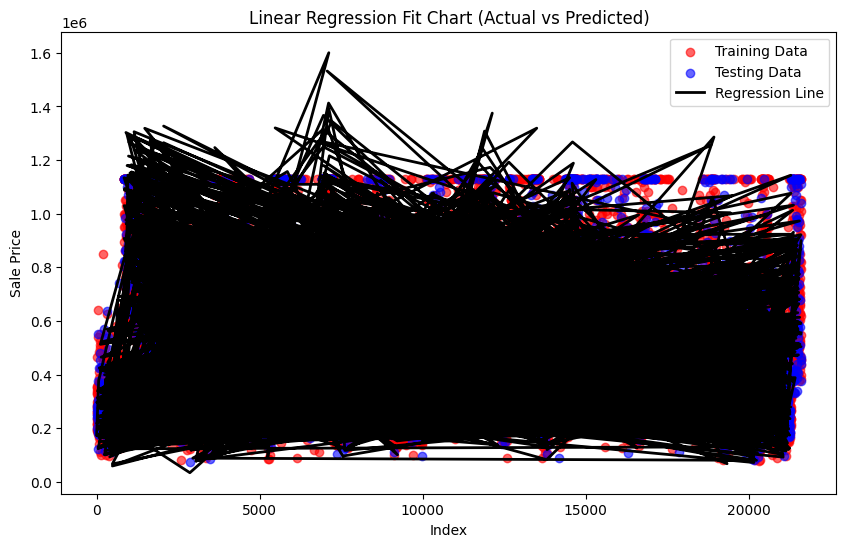

In [72]:
# ------------------ Linear Regression Fit Chart ------------------

# 1. Fit the Linear Regression Model
lin_model = LinearRegression()
lin_model.fit(x_scaled, yTrain)

# 2. Predict on test data
y_pred = lin_model.predict(x_scaled_test)

# 3. Plot training, testing, and regression line
plt.figure(figsize=(10,6))

# Training data (x_scaled vs yTrain)
plt.scatter(yTrain.index, yTrain, color="red", label="Training Data", alpha=0.6)

# Testing data (x_scaled_test vs yTest)
plt.scatter(yTest.index, yTest, color="blue", label="Testing Data", alpha=0.6)

# Regression line (Predicted values against yTest index)
plt.plot(yTest.index, y_pred, color="black", linewidth=2, label="Regression Line")

plt.title("Linear Regression Fit Chart (Actual vs Predicted)")
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.legend()
plt.show()


In [66]:
#Models without standard scalar(Tree based Ensembles)

from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

models = {
    "Gradient Boosting Regressor": GradientBoostingRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=4,
        random_state=42
    ),
    "XGBoost Regressor": XGBRegressor(
        n_estimators=300,
        learning_rate=0.1,
        max_depth=4,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42,
        verbosity=0
    )
}

results = []

for name, model in models.items():
    model.fit(x_Train, yTrain)
    y_pred = model.predict(x_Test)
    
    r2 = r2_score(yTest, y_pred)
    rmse = np.sqrt(mean_squared_error(yTest, y_pred))
    mae = mean_absolute_error(yTest, y_pred)
    
    results.append({
        'Model': name,
        'R² Score': round(r2, 4),
        'RMSE': round(rmse, 2),
        'MAE': round(mae, 2)
    })

results_df = pd.DataFrame(results).sort_values(by='R² Score', ascending=False).reset_index(drop=True)
print(" Model Comparison Results (Non-Scaled Models):\n")
print(results_df)
xgb_model = models["XGBoost Regressor"]


 Model Comparison Results (Non-Scaled Models):

                         Model  R² Score      RMSE       MAE
0            XGBoost Regressor    0.8867  83831.81  59583.07
1  Gradient Boosting Regressor    0.8865  83903.83  59452.74


#### SHAP (Shapley Additive explanations)

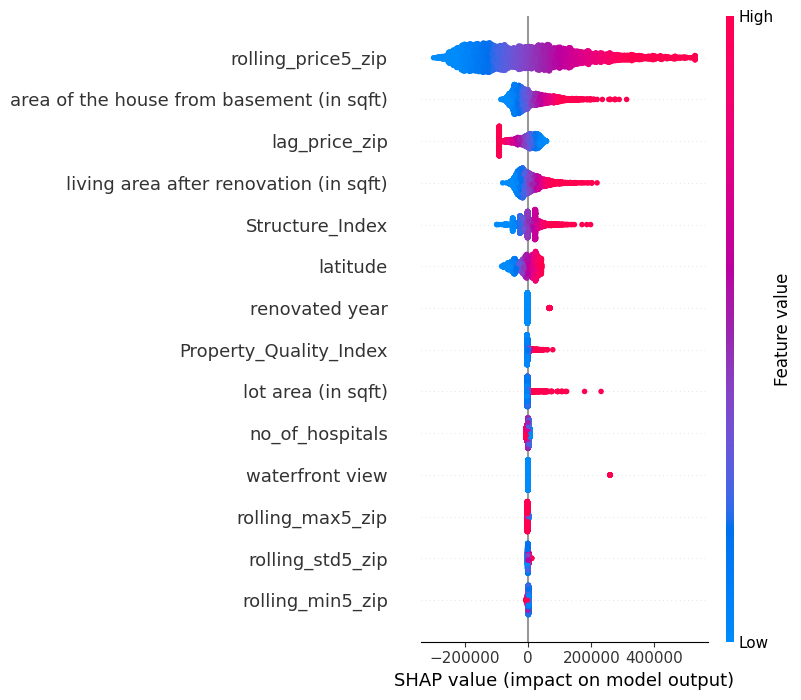

In [67]:
#For Linear / Ridge / Lasso:
from sklearn.linear_model import Ridge
import shap

# Train Ridge separately for SHAP
ridge = Ridge(alpha=1.0)
ridge.fit(x_scaled, yTrain)

# SHAP explainability
shap.initjs()
explainer = shap.LinearExplainer(ridge, x_scaled)
shap_values = explainer.shap_values(x_scaled_test)

shap.summary_plot(shap_values, x_scaled_test, feature_names=x.columns)


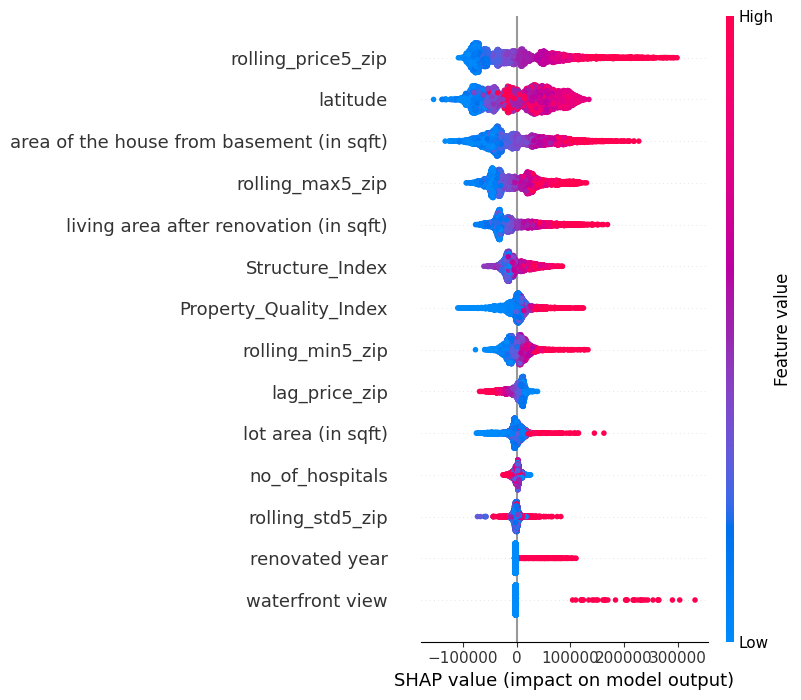

In [68]:
from xgboost import XGBRegressor
import shap

# Train XGBoost separately for SHAP
xgb = XGBRegressor(
    n_estimators=300,
    learning_rate=0.1,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42,
    verbosity=0
)
xgb.fit(x_Train, yTrain)

# SHAP explainability
shap.initjs()

# ✅ FIX: use tree_path_dependent to handle xgboost>=2.0
explainer = shap.TreeExplainer(xgb, feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(x_Test)

# SHAP summary plot
shap.summary_plot(shap_values, x_Test, feature_names=x.columns)


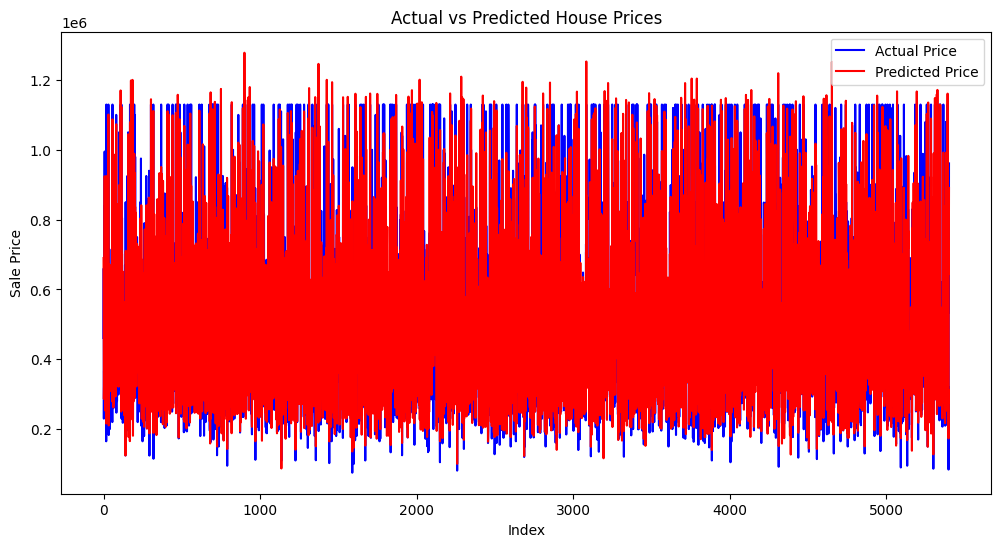

In [71]:
plt.figure(figsize=(12,6))

plt.plot(range(len(yTest)), yTest, label='Actual Price', color='blue')
plt.plot(range(len(y_pred)), y_pred, label='Predicted Price', color='red')

plt.title("Actual vs Predicted House Prices")
plt.xlabel("Index")
plt.ylabel("Sale Price")
plt.legend()
plt.show()

In [ ]:
# Function to collect user input and predict price
def predict_house_price_xgb(model):
    print("\n Enter house details below to predict the Sale Price:\n")
    
    # Collect all 14 features manually
    rolling_price5_zip = float(input("Enter rolling_price5_zip: "))
    rolling_max5_zip = float(input("Enter rolling_max5_zip: "))
    rolling_min5_zip = float(input("Enter rolling_min5_zip: "))
    living_area = float(input("Enter living area after renovation (in sqft): "))
    basement_area = float(input("Enter area of the house from basement (in sqft): "))
    lag_price_zip = float(input("Enter lag_price_zip: "))
    structure_index = float(input("Enter Structure_Index: "))
    rolling_std5_zip = float(input("Enter rolling_std5_zip: "))
    latitude = float(input("Enter latitude: "))
    property_quality_index = float(input("Enter Property_Quality_Index: "))
    waterfront_view = float(input("Enter waterfront view (0 = No, 1 = Yes): "))
    renovated_year = float(input("Enter renovated year (0 if never renovated): "))
    no_of_hospitals = float(input("Enter no_of_hospitals nearby: "))
    lot_area = float(input("Enter lot area (in sqft): "))

    # Create a DataFrame with same column order as training data
    user_data = pd.DataFrame([[
        rolling_price5_zip, rolling_max5_zip, rolling_min5_zip,
        living_area, basement_area, lag_price_zip, structure_index,
        rolling_std5_zip, latitude, property_quality_index,
        waterfront_view, renovated_year, no_of_hospitals, lot_area
    ]], columns=[
        'rolling_price5_zip', 'rolling_max5_zip', 'rolling_min5_zip',
        'living area after renovation (in sqft)',
        'area of the house from basement (in sqft)',
        'lag_price_zip', 'Structure_Index', 'rolling_std5_zip',
        'latitude', 'Property_Quality_Index', 'waterfront view',
        'renovated year', 'no_of_hospitals', 'lot area (in sqft)'
    ])

    # Predict price
    predicted_price = model.predict(user_data)[0]

    # Display result
    print("\n Predicted Sale Price: ₹{:,.2f}".format(predicted_price))
    print("(Rounded: ₹{} Lakh approx)".format(round(predicted_price / 100000, 2)))

# Call the function
predict_house_price_xgb(xgb_model)



 Enter house details below to predict the Sale Price:



In [ ]:
!pip install xgboost==1.7.6